In [45]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [46]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")
df_train

,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,upload_datum,apk,merk_abarth,merk_alfa,merk_audi,...,model_v60,model_vectra,model_vel,model_volkswagen,model_wagon,model_xsara,model_yaris,model_ypsilon,model_yrv,model_zr
172,2011,145063.0,220.0,10750.0,0.0,24,83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1184,2012,147251.0,68.0,3995.0,1.0,4,197,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2051,2014,104410.0,109.0,8950.0,0.0,2,113,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1186,2008,131739.0,65.0,2950.0,1.0,2,186,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1465,2016,97668.0,192.0,17400.0,0.0,2,49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,2015,77239.0,84.0,9400.0,1.0,2,321,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1336,2015,47029.0,90.0,8500.0,1.0,2,321,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,2004,56800.0,75.0,2699.0,0.0,2,286,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1023,2002,140442.0,86.0,1499.0,1.0,19,346,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_train.drop(['prijs'], axis=1)
y_test = df_train[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

Epoch 1/500
66/66 [==============================] - 0s 5ms/step - loss: 92658568.0000 - mae: 7524.0288 - mse: 92658568.0000 - val_loss: 85942544.0000 - val_mae: 7240.6836 - val_mse: 85942544.0000
Epoch 2/500
66/66 [==============================] - 0s 3ms/step - loss: 65047020.0000 - mae: 5886.4258 - mse: 65047020.0000 - val_loss: 29373004.0000 - val_mae: 3466.9607 - val_mse: 29373004.0000
Epoch 3/500
66/66 [==============================] - 0s 3ms/step - loss: 12857271.0000 - mae: 2483.2427 - mse: 12857271.0000 - val_loss: 13102512.0000 - val_mae: 2320.8928 - val_mse: 13102512.0000
Epoch 4/500
66/66 [==============================] - 0s 3ms/step - loss: 6771159.0000 - mae: 1833.6235 - mse: 6771159.0000 - val_loss: 10652372.0000 - val_mae: 1981.4274 - val_mse: 10652372.0000
Epoch 5/500
66/66 [==============================] - 0s 3ms/step - loss: 4943850.0000 - mae: 1529.1456 - mse: 4943850.0000 - val_loss: 9023428.0000 - val_mae: 1749.5327 - val_mse: 9023428.0000
Epoch 6/500
66/66 [==

(0.0, 30.0)

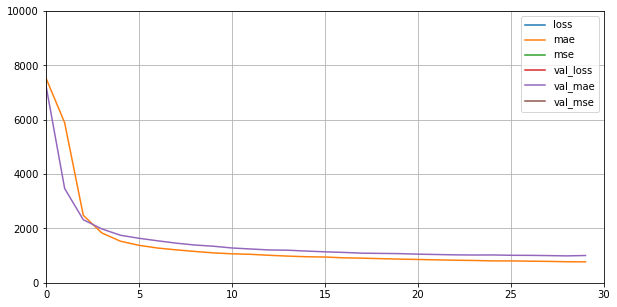

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(400, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

history = model.fit(
    X_train_tf, 
    y_train_tf.values, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid.values),
    verbose=1,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test.values)

pd.DataFrame(history.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 10000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [49]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

INFO:tensorflow:Assets written to: TFAuto\assets


['TFAuto\\TFScaler.pkl']